# 이미지 분류 - 완전연결층
---
fully connected layer 구현

tensorflow - dense layer

- Fashion Mnist 데이터셋

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle boot']

In [4]:
# 시각화 

samples = np.random.randint(60000, size=9)
samples

array([ 1459, 42823, 38200, 51785, 52299, 48940,    80,  5982, 49458])

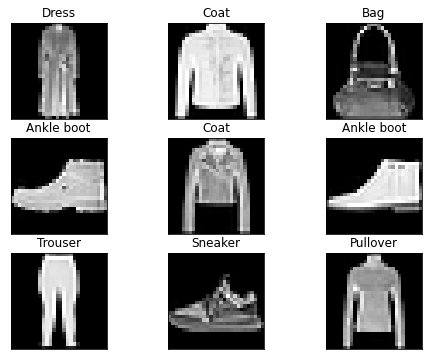

In [5]:
plt.figure(figsize=(8,6))
for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[idx], cmap="gray")
  plt.xticks([])
  plt.yticks([])
  plt.title(class_name[y_train[idx]])

plt.show()

## 검증용 데이터 (Validation Data

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

In [7]:
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)
#데이터가 충분히 많을 때는 검증용 데이터도 나눠서 사용하는 게 좋음 

(42000, 28, 28) (18000, 28, 28)
(42000,) (18000,)


##정규화
- min-Max 정규화

In [8]:
X_train = X_train/255
#255로 안나눠도 됨

In [9]:
X_val = X_val/255
X_test = X_test/255

In [ ]:
X_train = X_train.reshape(-1, 28*28)
X_val = X_val.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train.shape

(29400, 784)

In [11]:
# Y 값 one-hot 인코딩 (다중 분류)
from keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

## 모델 생성

In [12]:
#X를 1차원으로 변경해야 모델에 넣을 수 있음
X_train = X_train.reshape(-1, 28 * 28)
X_val = X_val.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train.shape

(42000, 784)

In [18]:
model = keras.Sequential([
    layers.Dense(units=256, activation='relu', input_shape = (784,)),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=32, activation='relu'),

    #이진 분류 모델: sigmoid 출력층 - 0 or 1
    # 다중 분류: softmax
    layers.Dense(units = 10, activation='softmax'),
])

model.summary()
    
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=["acc"]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


## 학습

In [19]:
epochs = 30
batch_size = 32

history = model.fit(X_train, y_train_oh, epochs=epochs,
                    batch_size = batch_size, validation_data=(X_val, y_val_oh), verbose=1)

Epoch 1/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5317 - acc: 0.8095 - val_loss: 0.5326 - val_acc: 0.8053
Epoch 2/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3912 - acc: 0.8570 - val_loss: 0.3644 - val_acc: 0.8695
Epoch 3/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3485 - acc: 0.8714 - val_loss: 0.3442 - val_acc: 0.8742
Epoch 4/30
1313/1313 [==============================] - 7s 6ms/step - loss: 0.3222 - acc: 0.8804 - val_loss: 0.3317 - val_acc: 0.8821
Epoch 5/30
1313/1313 [==============================] - 7s 6ms/step - loss: 0.3037 - acc: 0.8858 - val_loss: 0.3382 - val_acc: 0.8792
Epoch 6/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2866 - acc: 0.8929 - val_loss: 0.3395 - val_acc: 0.8789
Epoch 7/30
1313/1313 [==============================] - 7s 6ms/step - loss: 0.2722 - acc: 0.8985 - val_loss: 0.3318 - val_acc: 0.8839
Epoch 8/30
1313/1313 [==============================] - 8s 6ms

## 평가

In [20]:
model.evaluate(X_train, y_train_oh)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.1685 - acc: 0.9416


[0.16849328577518463, 0.9415714144706726]

In [21]:
model.evaluate(X_test, y_test_oh)


313/313 [==============================] - 1s 3ms/step - loss: 0.4998 - acc: 0.8828


[0.4997844696044922, 0.8827999830245972]

## 예측

In [22]:
y_pred = model.predict(X_test)

y_pred

313/313 [==============================] - 1s 2ms/step


array([[1.09256595e-08, 1.54634616e-09, 1.72874679e-05, ...,
        1.33057313e-06, 2.25387642e-09, 9.99696493e-01],
       [2.92995765e-06, 1.58895385e-14, 9.96804297e-01, ...,
        1.94030771e-20, 1.85699953e-13, 4.81157754e-16],
       [5.42990354e-22, 9.99999940e-01, 6.57502101e-30, ...,
        0.00000000e+00, 1.19723101e-38, 7.47812174e-38],
       ...,
       [2.09373155e-13, 3.06682720e-15, 2.11249665e-13, ...,
        1.30815951e-19, 9.99999940e-01, 7.15546672e-22],
       [3.60726616e-17, 9.99999940e-01, 4.95853224e-20, ...,
        1.98585862e-28, 1.20955942e-26, 1.33009048e-24],
       [9.50710359e-18, 1.02324621e-14, 1.92435337e-16, ...,
        2.26630048e-09, 3.99977516e-11, 1.53142391e-13]], dtype=float32)

In [23]:

#One-hot 전으로 되돌리기 (정답값의 형태로)
y_pred = np.argmax(y_pred, axis=1)

y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [26]:
# confusion matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
  cfm = confusion_matrix(y_true, y_pred)

  plt.figure(figsize=(5,5))
  sns.heatmap(cfm, annot=True, cbar=False, fmt="d")
  plt.xlabel("Predicted Class")
  plt.ylabel("True Class")
  plt.show()

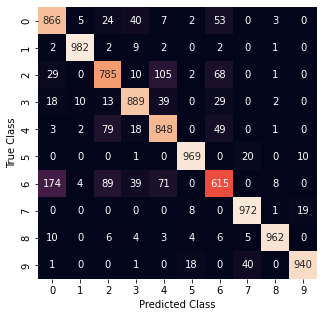

In [31]:
plot_confusion_matrix(y_test, y_pred)


## 오답 이미지 출력

In [34]:
#오답 이미지 출력
samples = np.where((y_test == y_pred) == False)[0]
samples

array([  17,   23,   29, ..., 9977, 9979, 9985])

In [35]:
samples = np.random.choice(samples, 9)
samples

array([1706,  316, 8051, 8324, 3999, 5474, 9622, 4213, 3554])

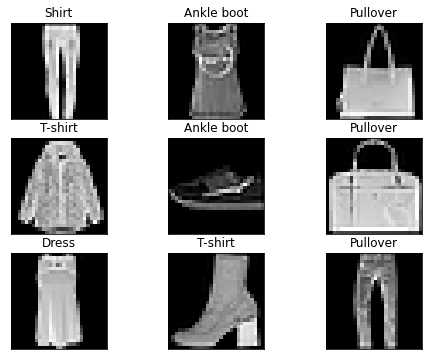

In [37]:
plt.figure(figsize=(8,6))
for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
  plt.xticks([])
  plt.yticks([])

  plt.title(class_name[y_test[idx]])

plt.show()